# Analazing the impact of Satisfaction with financial situation of household effect Feeling of happiness
## **Introduction**:
Happiness is a fundamental aspect of human well-being, and understanding the factors that influence it has long been a subject of study. Among these factors, financial satisfaction plays a significant role, as it impacts an individual’s ability to meet their needs and pursue personal goals. This project explores the relationship between satisfaction with one’s financial situation and feelings of happiness. By analyzing survey data, this study aims to uncover patterns and insights that highlight the importance of financial well-being in shaping happiness.

### **Project Overview**  
This project aims to analyze the relationship between household satisfaction with their financial situation and their feelings of happiness. Using a dataset derived from Moroccan households, the study applies various data manipulation, visualization, and geospatial analysis techniques to uncover trends and patterns.  

Key questions addressed include:  
- Does financial satisfaction significantly influence happiness?  
- Are there differences in the relationship between financial satisfaction and happiness in different regions of Morocco?


### **Methodology**  
The study employs a structured approach, using Python for data manipulation, statistical analysis, and visualization. The methodology includes:  
1. **Data Preparation**: Cleaning and preprocessing the Moroccan dataset to ensure consistency and completeness.  
2. **Exploratory Data Analysis (EDA)**: Generating descriptive statistics and visualizations to summarize the dataset and identify initial trends.  
3. **Correlation and Regression Analysis**: Examining the statistical relationship between financial satisfaction and happiness.  
4. **Geospatial Analysis**: Utilizing GeoPandas to map regional variations in the findings.  
5. **Data Visualization**: Leveraging Seaborn, Matplotlib, and Plotly for clear and interactive data presentation.

### **Key Steps**  
1. **Data Loading and Cleaning**:  
   - Load and view the dataset using `pandas`, `pyreadstat` and `Data Wrangler (vscode extension)`.  
   - Handle missing or inconsistent values to prepare for analysis.  

2. **Exploratory Data Analysis (EDA)**:  
   - Use `pandas`, `numpy` and `statsmodels` for descriptive statistics.  
   - Visualize data distributions and relationships using `matplotlib`, `seaborn` `plotly`.  

3. **Correlation and Statistical Modeling**:  
   - Compute correlation coefficients between financial satisfaction and happiness.  
   - Build regression models to quantify the relationship.  

4. **Geospatial Analysis**:  
   - Use `geopandas` to integrate geographic data.  
   - Create visualizations that highlight regional differences across Morocco.  

5. **Data Visualization and Insights**:  
   - Design static and interactive plots using Plotly to present results.  
   - Interpret the findings in the context of Morocco’s socioeconomic landscape.  

---

In [184]:
# Libraries used
#Manipulation/Calucaltion
import pandas as pd
import pyreadstat 
import numpy as np
from statsmodels.miscmodels.ordinal_model import OrderedModel
#plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
#goefileloade/read
import geopandas as gpd
import json
# pandast option setup
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [185]:
# Loading the main dataset: df 
df, meta = pyreadstat.read_sav('Project_Dataset.sav')

In [186]:
df

,version,doi,A_YEAR,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,J_INTDATE,FW_START,FW_END,K_TIME_START,K_TIME_END,K_DURATION,Q_MODE,N_REGION_ISO,N_REGION_WVS,N_TOWN,G_TOWNSIZE,G_TOWNSIZE2,H_SETTLEMENT,H_URBRURAL,I_PSU,O1_LONGITUDE,O2_LATITUDE,S_INTLANGUAGE,LNGE_ISO,E_RESPINT,F_INTPRIVACY,W_WEIGHT,S018,PWGHT,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q33_3,Q34,Q34_3,Q35,Q35_3,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,Q78,Q79,Q80,Q81,Q82,Q82_ARABLEAGUE,Q82_GULFCOOP,Q82_ISLCOOP,Q83,Q84,Q85,Q86,Q87,Q88,Q89,Q90,Q91,Q92,Q93,Q94,Q95,Q96,Q97,Q98,Q99,Q100,Q101,Q102,Q103,Q104,Q105,Q106,Q107,Q108,Q109,Q110,Q111,Q112,Q113,Q114,Q115,Q116,Q117,Q118,Q119,Q120,Q121,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q130,Q131,Q132,Q133,Q134,Q135,Q136,Q137,Q138,Q139,Q140,Q141,Q142,Q143,Q144,Q145,Q146,Q147,Q148,Q149,Q150,Q151,Q152,Q153,Q154,Q155,Q156,Q157,Q158,Q159,Q160,Q161,Q162,Q163,Q164,Q165,Q166,Q167,Q168,Q169,Q170,Q171,Q172,Q173,Q174,Q175,Q176,Q177,Q178,Q179,Q180,Q181,Q182,Q183,Q184,Q185,Q186,Q187,Q188,Q189,Q190,Q191,Q192,Q193,Q194,Q195,Q196,Q197,Q198,Q199,Q200,Q201,Q202,Q203,Q204,Q205,Q206,Q207,Q208,Q209,Q210,Q211,Q212,Q213,Q214,Q215,Q216,Q217,Q218,Q219,Q220,Q221,Q222,Q223,Q223_ABREV,Q223_LOCAL,Q224,Q225,Q226,Q227,Q228,Q229,Q230,Q231,Q232,Q233,Q234,Q234A,Q235,Q236,Q237,Q238,Q239,Q240,Q241,Q242,Q243,Q244,Q245,Q246,Q247,Q248,Q249,Q250,Q251,Q252,Q253,Q254,Q255,Q256,Q257,Q258,Q259,Q260,Q261,Q262,X003R,X003R2,Q263,Q264,Q265,Q266,Q267,Q268,Q269,Q270,Q271,Q272,Q273,Q274,Q275,Q275R,Q276,Q276R,Q277,Q277R,Q278,Q278R,Q279,Q280,Q281,Q282,Q283,Q284,Q285,Q286,Q287,Q288,Q288R,Q289,Q289CS9,Q290,Q291G1,Q291G2,Q291G3,Q291G4,Q291G5,Q291G6,Q291P1,Q291P2,Q291P3,Q291P4,Q291P5,Q291P6,Q291UN1,Q291UN2,Q291UN3,Q291UN4,Q291UN5,Q291UN6,Q292A,Q292B,Q292C,Q292D,Q292E,Q292F,Q292G,Q292H,Q292I,Q292J,Q292K,Q292L,Q292M,Q292N,Q292O,Q293,Q294A,Q294B,Y001,Y002,Y003,SACSECVAL,SACSECVALB,RESEMAVAL,RESEMAVALB,I_AUTHORITY,I_NATIONALISM,I_DEVOUT,DEFIANCE,I_RELIGIMP,I_RELIGBEL,I_RELIGPRAC,DISBELIEF,I_NORM1,I_NORM2,I_NORM3,RELATIVISM,I_TRUSTARMY,I_TRUSTPOLICE,I_TRUSTCOURTS,SCEPTICISM,I_INDEP,I_IMAGIN,I_NONOBED,AUTONOMY,I_WOMJOB,I_WOMPOL,I_WOMEDU,EQUALITY,I_HOMOLIB,I_ABORTLIB,I_DIVORLIB,CHOICE,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE,SECVALWGT,WEIGHT1A,WEIGHT1B,WEIGHT2A,WEIGHT2B,WEIGHT3A,WEIGHT3B,WEIGHT4A,WEIGHT4B,RESEMAVALBWGT,RESEMAVALWGT,SECVALBWGT,Y001_1,Y001_2,Y001_3,Y001_4,Y001_5
0,0.0,0.0,2021.0,504.0,MAR,600.0,MOR,504070001.0,20211112.0,202111.0,202112.0,10.05,10.43,38.0,2.0,504009.0,504019.0,504099.0,1.0,1.0,4.0,2.0,99.0,-8.84,29.49,170.0,ar,1.0,2.0,1.0,0.833333,31083.33333,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,3.0,2.0,3.0,5.0,8.0,6.0,4.0,3.0,4.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,4.0,4.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,1.0,4.0,4.0,4.0,3.0,2.0,1.0,1.0,3.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,4.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,5.0,5.0,5.0,2.0,10.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,8.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,0.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,2.0,4.0,6.0,8.0,8.0,5.0,6.0,8.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,1.0,6.0,2.0,8.0,1.0,1.0,1.0,3.0,10.0,1.0,4.0,4.0,2.0,3.0,5.0,1.0,2.0,2.0,4.0,2.0,2.0,5.0,1.0,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,2.0,2.0,504011.0,504011.0,504011.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,4.0,4.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,1.0,8.0,10.0,7.0,6.0,9.0,4.0,8.0,9.0,5.0,10.0,10.0,3.0,1.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,1969.0,52.0,4.0,3.0,1.0,1.0,1.0,504.0,504.0,504.0,1.0,8.0,1.0,500.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,5.0,5.0,9.0,9.0,2.0,1.0,

In [187]:
# setuping the variable view
variable_view = pd.DataFrame({
    "Variable Name": meta.column_names,
    "Label": meta.column_labels,
    "Values": [meta.variable_value_labels.get(var, {}) for var in meta.column_names]
})

In [188]:
variable_view.head(10)

,Variable Name,Label,Values
0,version,Version of Data File,{}
1,doi,Digital Object Identifier,{}
2,A_YEAR,Year of survey,"{2017.0: '2017', 2018.0: '2018', 2019.0: '2019..."
3,B_COUNTRY,ISO 3166-1 numeric country code,{504.0: 'Morocco'}
4,B_COUNTRY_ALPHA,ISO 3166-1 alpha-3 country code,{}
5,C_COW_NUM,CoW country code numeric,{600.0: 'Morocco'}
6,C_COW_ALPHA,CoW country code alpha,{}
7,D_INTERVIEW,Interview ID,{}
8,J_INTDATE,Date of interview,"{-5.0: 'No answer; Missing; GB,NIRL: Postal su..."
9,FW_START,Year/month of start-fieldwork,{}


In [189]:
# seting up the labeled view dataframe: labeled_df
labeled_df = df.copy()
for column, value_labels in meta.variable_value_labels.items():
    if column in labeled_df.columns:
        # Ensure consistent types between DataFrame values and value_labels keys
        value_labels = {float(k): v for k, v in value_labels.items()}  # Convert keys to float
        labeled_df[column] = labeled_df[column].map(value_labels).fillna(labeled_df[column])

In [190]:
labeled_df.head(5)

,version,doi,A_YEAR,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,J_INTDATE,FW_START,FW_END,K_TIME_START,K_TIME_END,K_DURATION,Q_MODE,N_REGION_ISO,N_REGION_WVS,N_TOWN,G_TOWNSIZE,G_TOWNSIZE2,H_SETTLEMENT,H_URBRURAL,I_PSU,O1_LONGITUDE,O2_LATITUDE,S_INTLANGUAGE,LNGE_ISO,E_RESPINT,F_INTPRIVACY,W_WEIGHT,S018,PWGHT,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q33_3,Q34,Q34_3,Q35,Q35_3,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,Q78,Q79,Q80,Q81,Q82,Q82_ARABLEAGUE,Q82_GULFCOOP,Q82_ISLCOOP,Q83,Q84,Q85,Q86,Q87,Q88,Q89,Q90,Q91,Q92,Q93,Q94,Q95,Q96,Q97,Q98,Q99,Q100,Q101,Q102,Q103,Q104,Q105,Q106,Q107,Q108,Q109,Q110,Q111,Q112,Q113,Q114,Q115,Q116,Q117,Q118,Q119,Q120,Q121,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q130,Q131,Q132,Q133,Q134,Q135,Q136,Q137,Q138,Q139,Q140,Q141,Q142,Q143,Q144,Q145,Q146,Q147,Q148,Q149,Q150,Q151,Q152,Q153,Q154,Q155,Q156,Q157,Q158,Q159,Q160,Q161,Q162,Q163,Q164,Q165,Q166,Q167,Q168,Q169,Q170,Q171,Q172,Q173,Q174,Q175,Q176,Q177,Q178,Q179,Q180,Q181,Q182,Q183,Q184,Q185,Q186,Q187,Q188,Q189,Q190,Q191,Q192,Q193,Q194,Q195,Q196,Q197,Q198,Q199,Q200,Q201,Q202,Q203,Q204,Q205,Q206,Q207,Q208,Q209,Q210,Q211,Q212,Q213,Q214,Q215,Q216,Q217,Q218,Q219,Q220,Q221,Q222,Q223,Q223_ABREV,Q223_LOCAL,Q224,Q225,Q226,Q227,Q228,Q229,Q230,Q231,Q232,Q233,Q234,Q234A,Q235,Q236,Q237,Q238,Q239,Q240,Q241,Q242,Q243,Q244,Q245,Q246,Q247,Q248,Q249,Q250,Q251,Q252,Q253,Q254,Q255,Q256,Q257,Q258,Q259,Q260,Q261,Q262,X003R,X003R2,Q263,Q264,Q265,Q266,Q267,Q268,Q269,Q270,Q271,Q272,Q273,Q274,Q275,Q275R,Q276,Q276R,Q277,Q277R,Q278,Q278R,Q279,Q280,Q281,Q282,Q283,Q284,Q285,Q286,Q287,Q288,Q288R,Q289,Q289CS9,Q290,Q291G1,Q291G2,Q291G3,Q291G4,Q291G5,Q291G6,Q291P1,Q291P2,Q291P3,Q291P4,Q291P5,Q291P6,Q291UN1,Q291UN2,Q291UN3,Q291UN4,Q291UN5,Q291UN6,Q292A,Q292B,Q292C,Q292D,Q292E,Q292F,Q292G,Q292H,Q292I,Q292J,Q292K,Q292L,Q292M,Q292N,Q292O,Q293,Q294A,Q294B,Y001,Y002,Y003,SACSECVAL,SACSECVALB,RESEMAVAL,RESEMAVALB,I_AUTHORITY,I_NATIONALISM,I_DEVOUT,DEFIANCE,I_RELIGIMP,I_RELIGBEL,I_RELIGPRAC,DISBELIEF,I_NORM1,I_NORM2,I_NORM3,RELATIVISM,I_TRUSTARMY,I_TRUSTPOLICE,I_TRUSTCOURTS,SCEPTICISM,I_INDEP,I_IMAGIN,I_NONOBED,AUTONOMY,I_WOMJOB,I_WOMPOL,I_WOMEDU,EQUALITY,I_HOMOLIB,I_ABORTLIB,I_DIVORLIB,CHOICE,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE,SECVALWGT,WEIGHT1A,WEIGHT1B,WEIGHT2A,WEIGHT2B,WEIGHT3A,WEIGHT3B,WEIGHT4A,WEIGHT4B,RESEMAVALBWGT,RESEMAVALWGT,SECVALBWGT,Y001_1,Y001_2,Y001_3,Y001_4,Y001_5
0,0.0,0.0,2021,Morocco,MAR,Morocco,MOR,504070001.0,20211112.0,202111.0,202112.0,10.05,10.43,38.0,Paper-and-Pencil Interviewing (PAPI),MA-09 Souss-Massa,MA: MA-09 Souss-Massa,MA: Afella Ighir,"Under 2,000","Under 5,000","Another city, town (not a regional or district...",Rural,99.0,-8.84,29.49,Arabic,ar,Respondent was very interested,There were other people around who could follo...,No weighting,0.833333,31083.33333,Very important,Rather important,Very important,Very important,Very important,Very important,Important,Not mentioned,Important,Important,Not mentioned,Not mentioned,Not mentioned,Not mentioned,Important,Not mentioned,Important,Mentioned,Not mentioned,Not mentioned,Mentioned,Mentioned,Mentioned,Not mentioned,Mentioned,Not mentioned,Agree strongly,Agree,Agree strongly,Disagree,Agree strongly,Agree strongly,Agree,Agree,Agree strongly,Agree,Strongly agree,Agree,Agree,Agree strongly,Strongly agree,Strongly agree,Neither agree nor disagree,Our society must be gradually improved by reforms,Don't mind,Good thing,Bad thing,Quite happy,Fair,5,8,6,Never,Rarely,Never,Never,Never,Or about the same,Need to be very careful,Trust completely,Do not trust very much,Trust somewhat,Do not trust at all,Do not trust at all,Trust somewhat,Quite a lot,Not very much,Not very much,Quite a lot,Not very much,Not very much,A great deal,None at all,None at all,None at all,Not very much,Quite a lot,A great deal,A great deal,Not

In [191]:
# searching for anything that contains the letters that are in Satisfaction 
variable_view[variable_view['Label'].str.contains('Sati')]

,Variable Name,Label,Values
82,Q49,Satisfaction with your life,{-5.0: 'Other missing; Multiple answers Mail (...
83,Q50,Satisfaction with financial situation of house...,"{-5.0: 'Missing; Unknown', -4.0: 'Not asked', ..."
291,Q252,Satisfaction with the political system perform...,{-5.0: 'Other missing; Multiple answers Mail (...


In [192]:
# searching for anything that contains the letters that are in Happiness 
variable_view[variable_view['Label'].str.contains('hap')]

,Variable Name,Label,Values
79,Q46,Feeling of happiness,{-5.0: 'Other missing; Multiple answers Mail (...


In [193]:
# combining the results that we want
satisfaction_df = pd.DataFrame({
    'Satisfaction with financial situation of household (NV_Q50)': df['Q50'],
    'Feeling of happiness (NV_Q46)': df['Q46'],
    'Feeling of happiness (LV_Q46)': labeled_df['Q46'],
})

In [194]:
satisfaction_df.head(30)

,Satisfaction with financial situation of household (NV_Q50),Feeling of happiness (NV_Q46),Feeling of happiness (LV_Q46)
0,6.0,2.0,Quite happy
1,2.0,4.0,Not at all happy
2,3.0,3.0,Not very happy
3,6.0,2.0,Quite happy
4,4.0,3.0,Not very happy
...,...,...,...
25,6.0,2.0,Quite happy
26,7.0,2.0,Quite happy
27,8.0,2.0,Quite happy
28,6.0,2.0,Quite happy


In [195]:
# setting up the frequency table for Feeling of happiness
FoH_frequency_df = satisfaction_df[['Feeling of happiness (LV_Q46)','Feeling of happiness (NV_Q46)']].value_counts().reset_index().sort_values(by='Feeling of happiness (NV_Q46)')
# calculating the percentages of Feeling of happiness
perFoH = satisfaction_df[['Feeling of happiness (LV_Q46)']].value_counts(normalize=True)*100
# merge Percentage of Feeling of happiness
FoH_frequency_df = FoH_frequency_df.merge(perFoH, on='Feeling of happiness (LV_Q46)')
#rename the proportion to perFoH
FoH_frequency_df.rename(columns={'proportion':'perFoH'}, inplace=True)
#calculating the mean
mean_SFSH=satisfaction_df.groupby('Feeling of happiness (LV_Q46)')['Satisfaction with financial situation of household (NV_Q50)'].mean().reset_index().sort_values(by= 'Feeling of happiness (LV_Q46)', ascending=False)
# mearging the mean of Satisfaction with financial situation of household with Feeling of happiness frequency table
FoH_frequency_df=FoH_frequency_df.merge(mean_SFSH, how='left', on='Feeling of happiness (LV_Q46)')


In [196]:
FoH_frequency_df

,Feeling of happiness (LV_Q46),Feeling of happiness (NV_Q46),count,perFoH,Satisfaction with financial situation of household (NV_Q50)
0,Very happy,1.0,149,12.416667,7.677852
1,Quite happy,2.0,845,70.416667,6.431953
2,Not very happy,3.0,195,16.250000,4.492308
3,Not at all happy,4.0,11,0.916667,2.818182


C:\Users\ULTRAPC\AppData\Local\Temp\ipykernel_18144\813135986.py:23: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



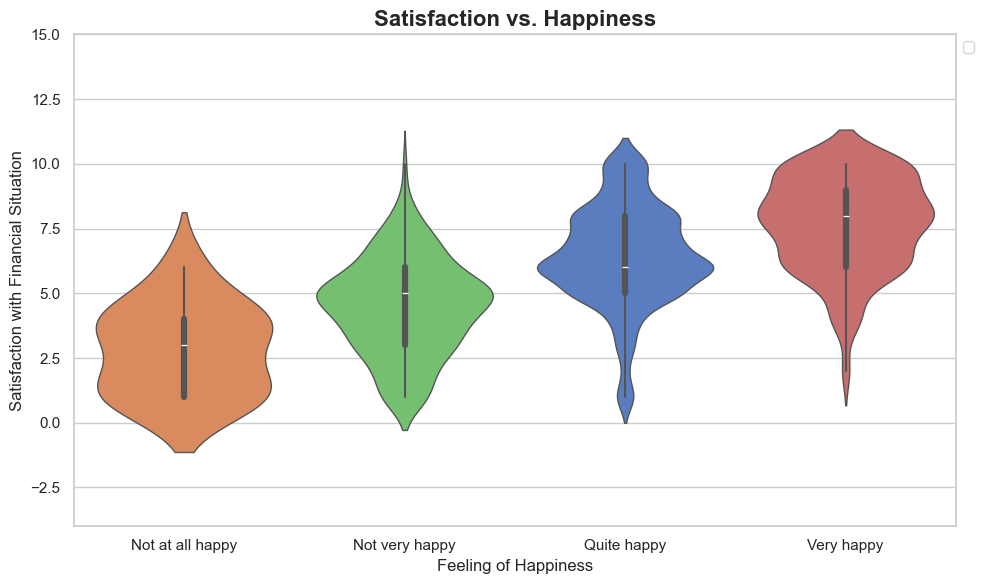

In [197]:
# Set a stylish theme
sns.set_theme(style="whitegrid")

# Create the violin plot with additional aesthetics
plt.figure(figsize=(10, 6))  # Set figure size
sns.violinplot(
    data=satisfaction_df,
    x='Feeling of happiness (LV_Q46)', 
    y='Satisfaction with financial situation of household (NV_Q50)', 
    hue='Feeling of happiness (LV_Q46)', 
    order=['Not at all happy', 'Not very happy', 'Quite happy', 'Very happy'], 
    palette="muted",  # Softer, aesthetic colors
    scale="count",  # Adjust width by count of observations
    linewidth=1  # Add a clean outline
)

# Add a title and labels with better styling
plt.title("Satisfaction vs. Happiness", fontsize=16, fontweight="bold")
plt.xlabel("Feeling of Happiness", fontsize=12)
plt.ylabel("Satisfaction with Financial Situation", fontsize=12)

# Remove the legend title and place it outside the plot
plt.legend(title='', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Zoom out by adjusting the axis limits (if needed)
plt.ylim(
    satisfaction_df['Satisfaction with financial situation of household (NV_Q50)'].min() - 5, 
    satisfaction_df['Satisfaction with financial situation of household (NV_Q50)'].max() + 5
)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [198]:
satisfaction_df[['Feeling of happiness (NV_Q46)']].corrwith(satisfaction_df['Satisfaction with financial situation of household (NV_Q50)']).reset_index(name='Satisfaction with financial situation of household')

,index,Satisfaction with financial situation of household
0,Feeling of happiness (NV_Q46),-0.438542


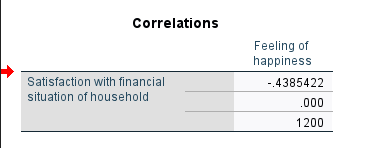

---
## Fixing the "Feeling of Happiness" Scale
When I calculated the correlation between Feeling of happiness (LV_Q46) and Satisfaction with financial situation of household (NV_Q50), I got a negative result, which didn’t make sense. After checking the data, I realized that the scale for Feeling of happiness (LV_Q46) was flipped meaning higher numbers showed less happiness, and lower numbers showed more happiness.

To fix this, I created a function to reverse the scale, so that higher numbers now represent more happiness. The new scale works like this:

- 1 → 4
- 2 → 3
- 3 → 2
- 4 → 1

which will be:
- 4: Very happy
- 3: Quite happy
- 2: Not very happy
- 1: Not at all happy

I applied this change and added a new column called Feeling of happiness (NV_Q46)_reversed to the dataset. Now, the values are in the correct order for further analysis.

Here’s the function I used to reverse the scale:

In [199]:
# mapping the old scale of Feeling o happiness with new scale 
def reverse_happiness(value):
    if pd.notnull(value):  # Ensure the value is not NaN
        mapping = {1: 4, 2: 3, 3: 2, 4: 1}
        return mapping.get(value, value)  # Return mapped value or the value itself if not in mapping
    return value
satisfaction_df['Feeling of happiness (NV_Q46)_reversed'] = satisfaction_df['Feeling of happiness (NV_Q46)'].apply(reverse_happiness)

In [200]:
satisfaction_df

,Satisfaction with financial situation of household (NV_Q50),Feeling of happiness (NV_Q46),Feeling of happiness (LV_Q46),Feeling of happiness (NV_Q46)_reversed
0,6.0,2.0,Quite happy,3
1,2.0,4.0,Not at all happy,1
2,3.0,3.0,Not very happy,2
3,6.0,2.0,Quite happy,3
4,4.0,3.0,Not very happy,2
...,...,...,...,...
1195,6.0,1.0,Very happy,4
1196,6.0,2.0,Quite happy,3
1197,3.0,2.0,Quite happy,3
1198,3.0,2.0,Quite happy,3


In [201]:
satisfaction_df[['Feeling of happiness (NV_Q46)_reversed']].corrwith(satisfaction_df['Satisfaction with financial situation of household (NV_Q50)']).reset_index(name='Satisfaction with financial situation of household')

,index,Satisfaction with financial situation of household
0,Feeling of happiness (NV_Q46)_reversed,0.438542


With this fix, the analysis is now based on the correct Feeling of happiness (NV_Q46)_reversed values, so the results should be more meaningful.

---

### **What Does a Correlation of 0.44 Mean?**

A correlation of **0.438542** tells us how **Feeling of happiness** and **Satisfaction with financial situation** are related. In simple terms:

- **Positive Correlation**: The positive number means that when people feel more satisfied with their finances, they tend to feel happier too. So, if someone's financial situation improves, their happiness often increases as well.
  
- **Strength of the Relationship**: A correlation of **0.44** is considered a **moderate** relationship. It's not super strong (like 0.9), but it's not weak either. It shows there's a noticeable link, but it’s not the only thing that matters.

- **What This Means**: This result tells us that financial satisfaction and happiness are connected, but it's not the whole story. While improving financial satisfaction can make people happier, other things like health, relationships, or personal goals might also be affecting how happy they feel.


---

## Regression and Why I Use Ordinal Regression

**Regression** is a statistical method used to understand the relationship between a dependent variable and one or more independent variables. It helps in predicting the value of the dependent variable based on the independent variables in other words, **Regression** is a method used to understand how different factors (independent variables) affect something we want to predict (dependent variable). It helps us estimate the value of one thing based on others.


### Why Use Ordinal Regression

We use **ordinal regression** when we want to predict outcomes that have **ordered categories**. For example, when predicting levels of happiness, where the categories have a clear order:
- 1: Not at all happy
- 2: Not very happy
- 3: Quite happy
- 4: Very happy

Ordinal regression helps us understand the relationship between independent variables and these ordered categories, while respecting the order of the categories. Unlike other methods, it accounts for the fact that the difference between categories might not be the same (for example, the difference between "Not at all happy" and "Not very happy" might not be the same as between "Quite happy" and "Very happy").


The categories have a natural order, but the distance between them is not necessarily equal. In such cases, **ordinal regression** is the best choice.

### Why Not Linear or Logistic Regression?

- **Linear Regression** assumes the dependent variable is continuous (like height or income) and has equal spacing between values. This is not suitable for ordinal data where the differences between categories may not be equal.
  
- **Logistic Regression** is used for binary outcomes (yes/no) or for nominal data (multiple categories without order). It doesn’t account for the order of categories, so it’s not appropriate for ordinal data.

Optimization terminated successfully.
         Current function value: 0.740002
         Iterations: 162
         Function evaluations: 277
                                       OrderedModel Results                                       
Dep. Variable:     Feeling of happiness (NV_Q46)_reversed   Log-Likelihood:                -888.00
Model:                                       OrderedModel   AIC:                             1784.
Method:                                Maximum Likelihood   BIC:                             1804.
Date:                                    Fri, 29 Nov 2024                                         
Time:                                            23:03:32                                         
No. Observations:                                    1200                                         
Df Residuals:                                        1196                                         
Df Model:                                               1           

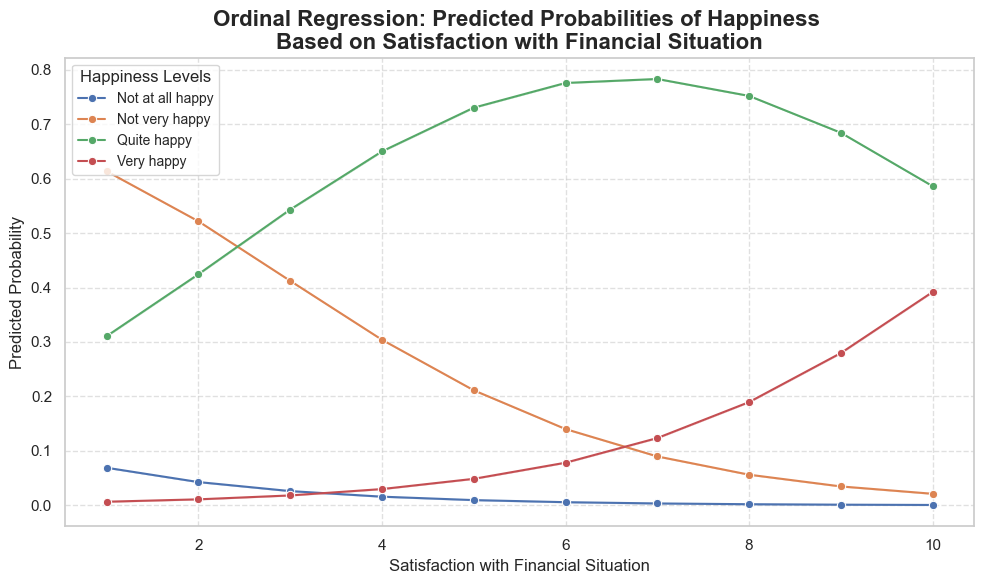

In [202]:
# Independent and dependent variables
X = satisfaction_df[['Satisfaction with financial situation of household (NV_Q50)']]  # Independent variable
y = satisfaction_df['Feeling of happiness (NV_Q46)_reversed']  # Ordinal dependent variable

# Fit the ordered logit model (ordinal regression)
model = OrderedModel(y, X, distr='logit')  # 'logit' specifies the logit link function
result = model.fit()

# Print the model summary
print(result.summary())

# Predict probabilities for each category
predictions = result.predict(X)

# Convert predictions to a NumPy array
predictions = predictions.to_numpy()

# Create a DataFrame to hold the predicted probabilities for each category
predictions_df = pd.DataFrame(predictions, columns=[f'Prob of Category {i+1}' for i in range(predictions.shape[1])])

# Add the satisfaction variable (X) to the DataFrame for plotting
predictions_df['Satisfaction with financial situation'] = satisfaction_df['Satisfaction with financial situation of household (NV_Q50)']

# Convert the DataFrame into long format for Plotly Express
predictions_long_df = predictions_df.melt(id_vars=['Satisfaction with financial situation'], 
                                        value_vars=[f'Prob of Category {i+1}' for i in range(predictions.shape[1])],
                                        var_name='Category',
                                        value_name='Probability')

# Map the happiness categories to human-readable labels
category_mapping = {0: 'Not at all happy',
                1: 'Not very happy',
                2: 'Quite happy',
                3: 'Very happy'}

# Extract category number from the 'Category' column and map to human-readable labels
predictions_long_df['Happiness Category'] = predictions_long_df['Category'].apply(
    lambda x: category_mapping[int(x.split()[-1])-1])  # map based on the category index (e.g. Category 1 -> Not at all happy)

# Create a Seaborn line plot to visualize the predicted probabilities
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(
    data=predictions_long_df,
    x='Satisfaction with financial situation', 
    y='Probability',
    hue='Happiness Category',  # Use happiness categories for line colors
    marker='o'  # Add markers for better readability
)

# Add titles and axis labels
plt.title(
    "Ordinal Regression: Predicted Probabilities of Happiness \nBased on Satisfaction with Financial Situation",
    fontsize=16,
    fontweight='bold'
)
plt.xlabel("Satisfaction with Financial Situation", fontsize=12)
plt.ylabel("Predicted Probability", fontsize=12)

# Adjust legend position and styling
plt.legend(title="Happiness Levels", loc='upper left', fontsize=10)

# Add gridlines for better readability
plt.grid(axis='both', linestyle='--', alpha=0.6)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### Interpretation of the Ordinal Regression Results

This section explains the results of the ordinal regression, which explores how satisfaction with the financial situation affects different levels of happiness.

---

#### **1. Summary of Findings**
The model predicts the likelihood of households falling into one of these happiness categories:
- **Not at all happy**
- **Not very happy**
- **Quite happy**
- **Very happy**

The probabilities of these categories are influenced by how satisfied a household is with their financial situation.

---

#### **2. Observations from the Results**
- **Clear Relationship**: The results show that as satisfaction with financial situations increases, the chances of being in higher happiness categories (like "Very happy") increase. At the same time, the likelihood of being in lower happiness categories (like "Not at all happy") decreases.
- **Smooth Changes**: The transition between categories is gradual. Intermediate categories like "Quite happy" increase and peak before declining as satisfaction rises further.

---

#### **3. Understanding the Predicted Probabilities**
From the visualization:
- **Low Satisfaction**: When households report low satisfaction with their financial situation, the chance of being "Not at all happy" or "Not very happy" is high.
- **High Satisfaction**: As financial satisfaction improves, households are more likely to be "Quite happy" or "Very happy."

For example:
- A household with low financial satisfaction (e.g., a score of 1) has a high chance of being "Not at all happy."
- A household with high financial satisfaction (e.g., a score of 4 or 5) is more likely to be "Very happy."

---
